# Logistic Regression with Scikit-Learn

## Overview
Binary classification using **scikit-learn's `LogisticRegression`**, with an exploration of the underlying concepts: the **sigmoid function**, **log loss cost function**, and **decision boundaries**.

### Key Formulas
- **Sigmoid:** $\sigma(z) = \frac{1}{1 + e^{-z}}$
- **Hypothesis:** $\hat{y} = \sigma(X\theta)$
- **Cost (Log Loss):** $J(\theta) = -\frac{1}{m}\sum[y\log(\hat{y}) + (1-y)\log(1-\hat{y})]$
- **Gradient:** $\nabla J = \frac{1}{m}X^T(\hat{y} - y)$
- **Update:** $\theta := \theta - \alpha \nabla J$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    log_loss, ConfusionMatrixDisplay
)

np.random.seed(42)

## 1. Generate and Visualize Dataset

Training: 240 samples
Test: 60 samples
Class distribution (train): [121 119]


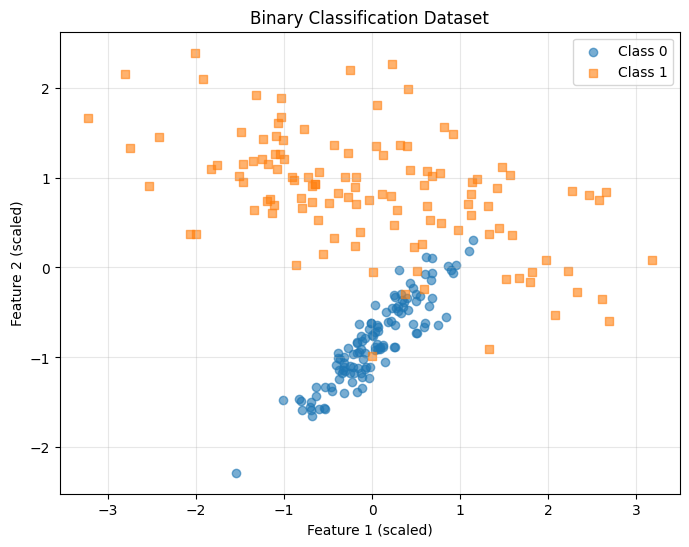

In [2]:
# Generate binary classification dataset
X, y = make_classification(
    n_samples=300, n_features=2, n_informative=2,
    n_redundant=0, n_clusters_per_class=1, random_state=42
)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Training: {X_train.shape[0]} samples')
print(f'Test: {X_test.shape[0]} samples')
print(f'Class distribution (train): {np.bincount(y_train)}')

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],
            alpha=0.6, label='Class 0', marker='o')
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1],
            alpha=0.6, label='Class 1', marker='s')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('Binary Classification Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2. Visualize the Sigmoid Function

The sigmoid function is the activation function used internally by Logistic Regression to map linear outputs to probabilities in [0, 1].

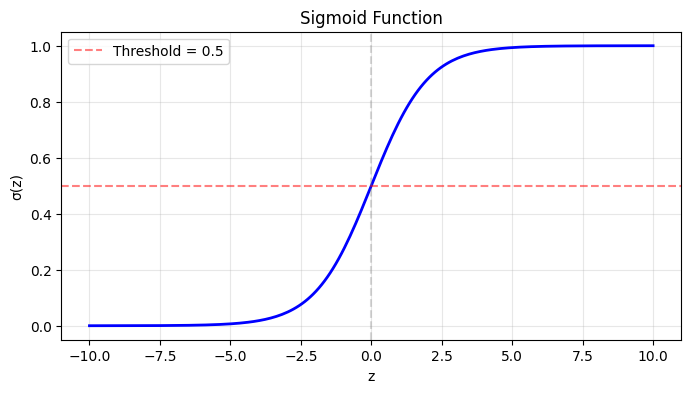

In [3]:
def sigmoid(z):
    """
    Sigmoid activation function.
    
    sigma(z) = 1 / (1 + e^(-z))
    """
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


# Visualize sigmoid
z_vals = np.linspace(-10, 10, 200)
plt.figure(figsize=(8, 4))
plt.plot(z_vals, sigmoid(z_vals), 'b-', linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Threshold = 0.5')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Cost Function (Log Loss / Binary Cross-Entropy)

Scikit-learn optimizes the log loss internally. The formula is:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\left[y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)\right]$$

Where $\hat{y}_i = \sigma(X_i\theta)$ is the predicted probability.

We can still compute the log loss manually using `sklearn.metrics.log_loss` for evaluation.

## 3. Train the Model with Scikit-Learn

In [4]:
# Train a Logistic Regression model using scikit-learn
model = LogisticRegression(
    solver='lbfgs',      # Efficient quasi-Newton optimizer
    max_iter=1000,       # Maximum iterations for convergence
    C=1.0,               # Inverse of regularization strength (higher = less regularization)
    random_state=42
)

model.fit(X_train_scaled, y_train)

print('Model trained successfully!')
print(f'\nModel parameters:')
print(f'  Intercept (theta_0): {model.intercept_[0]:.4f}')
print(f'  Coefficients:        {model.coef_[0]}')
print(f'  Solver:              {model.solver}')
print(f'  Iterations used:     {model.n_iter_[0]}')

Model trained successfully!

Model parameters:
  Intercept (theta_0): 0.0119
  Coefficients:        [0.48130537 3.72622303]
  Solver:              lbfgs
  Iterations used:     8


## 4. Evaluate Training Loss

In [5]:
# Compute log loss on train and test sets
y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

train_loss = log_loss(y_train, y_train_proba)
test_loss = log_loss(y_test, y_test_proba)

print(f'Training Log Loss: {train_loss:.6f}')
print(f'Test Log Loss:     {test_loss:.6f}')

Training Log Loss: 0.190439
Test Log Loss:     0.168038


## 5. Training Loss vs Regularization Strength

Since scikit-learn doesn't expose the cost history per iteration, we can explore how the regularization parameter `C` affects the final loss.

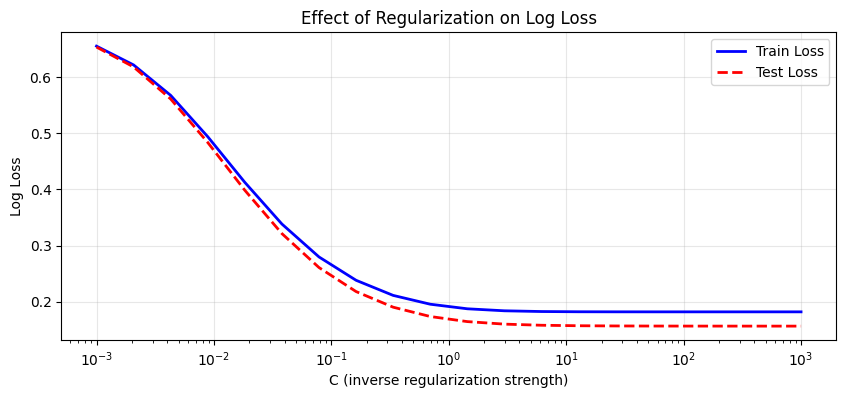

In [6]:
# Explore how regularization strength (C) affects loss
C_values = np.logspace(-3, 3, 20)
train_losses = []
test_losses = []

for C in C_values:
    m = LogisticRegression(C=C, solver='lbfgs', max_iter=1000, random_state=42)
    m.fit(X_train_scaled, y_train)
    train_losses.append(log_loss(y_train, m.predict_proba(X_train_scaled)[:, 1]))
    test_losses.append(log_loss(y_test, m.predict_proba(X_test_scaled)[:, 1]))

plt.figure(figsize=(10, 4))
plt.semilogx(C_values, train_losses, 'b-', linewidth=2, label='Train Loss')
plt.semilogx(C_values, test_losses, 'r--', linewidth=2, label='Test Loss')
plt.xlabel('C (inverse regularization strength)')
plt.ylabel('Log Loss')
plt.title('Effect of Regularization on Log Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Make Predictions and Evaluate

MODEL PERFORMANCE
Training Accuracy: 0.9167 (91.7%)
Test Accuracy:     0.9500 (95.0%)

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.91      1.00      0.95        31

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Confusion Matrix (Test Set):
[[26  3]
 [ 0 31]]


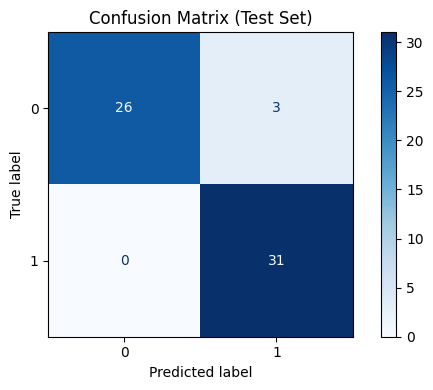

In [7]:
# Make predictions using the trained model
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('=' * 50)
print('MODEL PERFORMANCE')
print('=' * 50)
print(f'Training Accuracy: {train_acc:.4f} ({train_acc*100:.1f}%)')
print(f'Test Accuracy:     {test_acc:.4f} ({test_acc*100:.1f}%)')
print('\nClassification Report (Test Set):')
print(classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test Set):')
print(confusion_matrix(y_test, y_test_pred))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, ax=ax, cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.tight_layout()
plt.show()

## 7. Visualize Decision Boundary

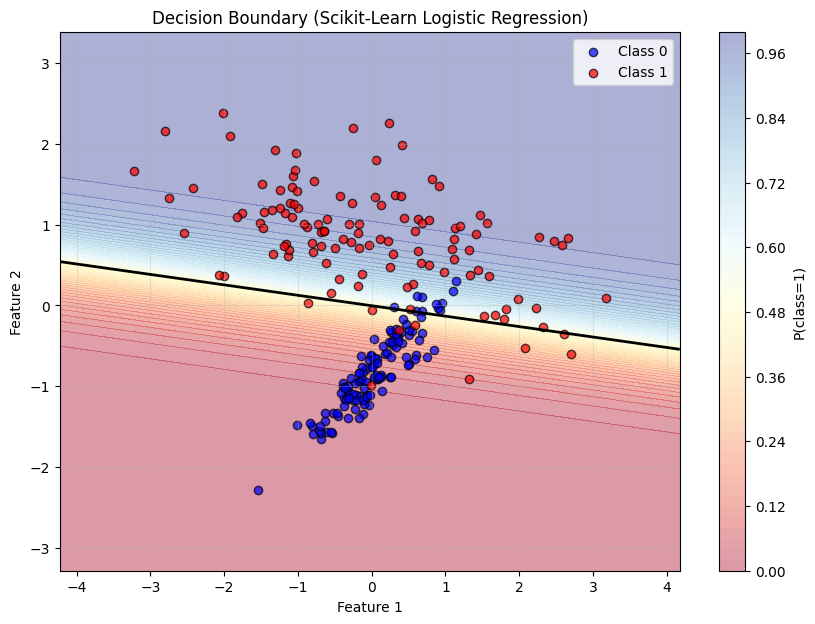

In [8]:
def plot_decision_boundary(X, y, model, title='Decision Boundary'):
    """
    Plot data points and decision boundary using a trained sklearn model.
    """
    plt.figure(figsize=(10, 7))
    
    # Create mesh grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                           np.linspace(x2_min, x2_max, 200))
    
    # Predict probabilities on the grid
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx1.shape)
    
    # Plot probability contours
    plt.contourf(xx1, xx2, probs, levels=50, cmap='RdYlBu', alpha=0.4)
    plt.colorbar(label='P(class=1)')
    
    # Decision boundary (where P = 0.5)
    plt.contour(xx1, xx2, probs, levels=[0.5], colors='black', linewidths=2)
    
    # Data points
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0',
                edgecolors='k', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1',
                edgecolors='k', alpha=0.7)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


# Plot decision boundary for our trained model
plot_decision_boundary(
    X_train_scaled, y_train, model,
    title='Decision Boundary (Scikit-Learn Logistic Regression)'
)

## 8. Exploring Different Solvers and Regularization

Scikit-learn's `LogisticRegression` supports multiple solvers and regularization types.

In [9]:
# Compare different solver/regularization combinations
configs = [
    {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0},
    {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1},
    {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10.0},
    {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0},
    {'solver': 'saga', 'penalty': 'elasticnet', 'C': 1.0, 'l1_ratio': 0.5},
    {'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0},
]

print(f'{"Solver":<12} {"Penalty":<14} {"C":<6} {"Train Acc":<12} {"Test Acc":<12} {"Iters"}')
print('=' * 70)

for cfg in configs:
    m = LogisticRegression(max_iter=5000, random_state=42, **cfg)
    m.fit(X_train_scaled, y_train)
    train_acc = m.score(X_train_scaled, y_train)
    test_acc = m.score(X_test_scaled, y_test)
    penalty_str = cfg.get('penalty', 'l2')
    if 'l1_ratio' in cfg:
        penalty_str += f' (l1_ratio={cfg["l1_ratio"]})'
    print(f'{cfg["solver"]:<12} {penalty_str:<14} {cfg["C"]:<6} {train_acc:<12.4f} {test_acc:<12.4f} {m.n_iter_[0]}')

Solver       Penalty        C      Train Acc    Test Acc     Iters
lbfgs        l2             1.0    0.9167       0.9500       8
lbfgs        l2             0.1    0.9167       0.9667       6
lbfgs        l2             10.0   0.9208       0.9500       10
liblinear    l1             1.0    0.9167       0.9667       9
saga         elasticnet (l1_ratio=0.5) 1.0    0.9167       0.9500       14
newton-cg    l2             1.0    0.9167       0.9500       5


## 9. Multi-Class Logistic Regression

Scikit-learn supports multi-class classification out of the box using One-vs-Rest (OvR) or Multinomial (Softmax) strategies.

In [10]:
from sklearn.datasets import load_iris

# Load Iris dataset (3 classes)
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42
)

scaler_iris = StandardScaler()
X_iris_train_sc = scaler_iris.fit_transform(X_iris_train)
X_iris_test_sc = scaler_iris.transform(X_iris_test)

# Compare OvR vs Multinomial (Softmax)
for strategy in ['ovr', 'multinomial']:
    m = LogisticRegression(multi_class=strategy, solver='lbfgs', max_iter=1000, random_state=42)
    m.fit(X_iris_train_sc, y_iris_train)
    train_acc = m.score(X_iris_train_sc, y_iris_train)
    test_acc = m.score(X_iris_test_sc, y_iris_test)
    print(f'Strategy: {strategy:<14} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}')

# Detailed report for multinomial
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model_multi.fit(X_iris_train_sc, y_iris_train)
y_iris_pred = model_multi.predict(X_iris_test_sc)

print('\nClassification Report (Multinomial - Iris):')
print(classification_report(y_iris_test, y_iris_pred, target_names=iris.target_names))

Strategy: ovr            | Train Acc: 0.9238 | Test Acc: 0.9111
Strategy: multinomial    | Train Acc: 0.9619 | Test Acc: 1.0000

Classification Report (Multinomial - Iris):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/home/maldu/dscience/projects/data-science-katas/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/maldu/dscience/projects/data-science-katas/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/maldu/dscience/projects/data-science-katas/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## 10. Threshold Tuning

The default threshold is 0.5, but it can be adjusted based on the problem.

Threshold: 0.1 -> Accuracy: 0.8333
Threshold: 0.2 -> Accuracy: 0.8833
Threshold: 0.3 -> Accuracy: 0.9167
Threshold: 0.4 -> Accuracy: 0.9333
Threshold: 0.5 -> Accuracy: 0.9500
Threshold: 0.6 -> Accuracy: 0.9833
Threshold: 0.7 -> Accuracy: 0.9333
Threshold: 0.8 -> Accuracy: 0.9000
Threshold: 0.9 -> Accuracy: 0.8167


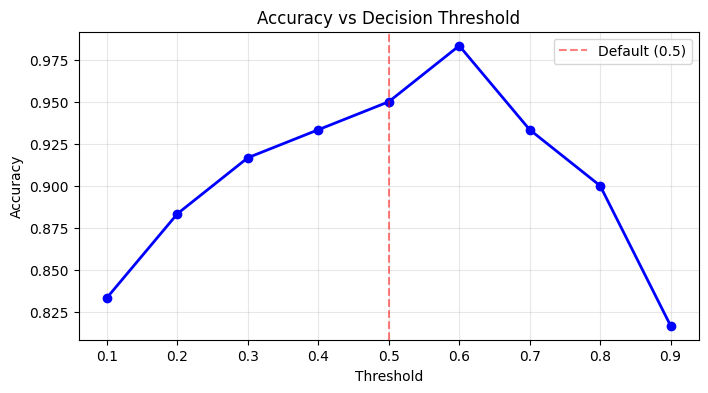

In [11]:
# Evaluate different thresholds using the sklearn model
thresholds = np.arange(0.1, 1.0, 0.1)
results = []

# Get predicted probabilities for class 1
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

for t in thresholds:
    preds = (y_test_proba >= t).astype(int)
    acc = accuracy_score(y_test, preds)
    results.append({'threshold': t, 'accuracy': acc})
    print(f'Threshold: {t:.1f} -> Accuracy: {acc:.4f}')

# Plot
plt.figure(figsize=(8, 4))
plt.plot(thresholds, [r['accuracy'] for r in results], 'bo-', linewidth=2)
plt.axvline(x=0.5, color='r', linestyle='--', alpha=0.5, label='Default (0.5)')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Decision Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Key Takeaways

1. **Sigmoid function** maps linear output to probability [0, 1]
2. **Log loss** (binary cross-entropy) is the cost function optimized by logistic regression
3. **Scikit-learn's `LogisticRegression`** handles optimization internally with efficient solvers (lbfgs, liblinear, saga, newton-cg)
4. **Regularization** (controlled by `C`) prevents overfitting — lower `C` means stronger regularization
5. **Multi-class** is supported via `multi_class='ovr'` (One-vs-Rest) or `multi_class='multinomial'` (Softmax)
6. **Threshold tuning** allows trading off precision vs recall for different use cases
7. Always **scale features** before fitting logistic regression for better convergence

## Applied Exercises

### Exercise 11: Two Logistic Regression Classifiers vs. One Softmax Regression

**Question:** Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

**Answer:**

You should implement **two independent Logistic Regression classifiers** — one for each label.

**Why?**

These are two **independent binary classification** tasks:
- Classifier 1: outdoor vs. indoor
- Classifier 2: daytime vs. nighttime

A picture can be any combination: outdoor+daytime, outdoor+nighttime, indoor+daytime, indoor+nighttime. The two labels are **not mutually exclusive**.

| Approach | Assumption | Output |
|---|---|---|
| **Two Logistic Regression classifiers** | Labels are **independent** | Two separate probabilities (one per task) |
| **One Softmax Regression classifier** | Classes are **mutually exclusive** | One probability distribution over all classes |

**Why NOT Softmax?**
- Softmax requires classes to be **mutually exclusive** (probabilities must sum to 1).
- If you treated this as a 4-class problem (outdoor+day, outdoor+night, indoor+day, indoor+night), Softmax would work technically, but:
  - It ignores the natural structure of two independent labels.
  - It requires more training data (4 classes instead of 2 × 2).
  - It doesn't generalize — adding a third label (e.g., sunny/cloudy) would require $2 \times 2 \times 2 = 8$ classes.

**General rule:**
- **Mutually exclusive classes** (cat, dog, bird) → Softmax Regression (or OvR)
- **Independent binary labels** (is_outdoor, is_daytime) → Separate Logistic Regression classifiers (multi-label classification)

This is called **multi-label classification**, as opposed to multi-class classification.

### Exercise 12: Batch Gradient Descent with Early Stopping for Softmax Regression

**Question:** Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).

**Answer:**

**Softmax Regression** (Multinomial Logistic Regression) generalizes Logistic Regression to $K > 2$ classes.

**Key formulas:**

**Softmax function** — converts raw scores (logits) into probabilities:

$$P(y = k \mid x) = \frac{e^{s_k(x)}}{\sum_{j=1}^{K} e^{s_j(x)}}$$

where $s_k(x) = \theta_k^T x$ is the score for class $k$.

**Cross-entropy cost function:**

$$J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)})$$

where $y_k^{(i)} = 1$ if sample $i$ belongs to class $k$ (one-hot encoding).

**Gradient for class $k$:**

$$\nabla_{\theta_k} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_k^{(i)} - y_k^{(i)}) \cdot x^{(i)}$$

**Early stopping:** Monitor validation loss and stop when it hasn't improved for a given number of epochs (patience).

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ============================================================
# Softmax Regression with Batch GD and Early Stopping
# ============================================================

def softmax(logits):
    """
    Compute softmax probabilities from logits.
    Uses the log-sum-exp trick for numerical stability.
    
    Parameters:
        logits: (m, K) array of raw scores
    Returns:
        (m, K) array of probabilities (rows sum to 1)
    """
    # Subtract max for numerical stability (prevents overflow in exp)
    exp_scores = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


def one_hot_encode(y, K):
    """
    One-hot encode class labels.
    
    Parameters:
        y: (m,) array of integer labels (0 to K-1)
        K: number of classes
    Returns:
        (m, K) one-hot encoded matrix
    """
    m = len(y)
    one_hot = np.zeros((m, K))
    one_hot[np.arange(m), y] = 1
    return one_hot


def compute_cross_entropy_cost(X, Y_one_hot, Theta):
    """
    Compute cross-entropy cost for Softmax Regression.
    
    Parameters:
        X: (m, n+1) feature matrix with intercept
        Y_one_hot: (m, K) one-hot encoded labels
        Theta: (n+1, K) parameter matrix
    Returns:
        Scalar cost value
    """
    m = X.shape[0]
    logits = X @ Theta                  # (m, K)
    probabilities = softmax(logits)     # (m, K)
    
    # Clip probabilities to avoid log(0)
    probabilities = np.clip(probabilities, 1e-12, 1 - 1e-12)
    
    # Cross-entropy: -1/m * sum of y_k * log(p_k)
    cost = -np.mean(np.sum(Y_one_hot * np.log(probabilities), axis=1))
    return cost


def compute_gradients(X, Y_one_hot, Theta):
    """
    Compute gradients for all K classes at once.
    
    Parameters:
        X: (m, n+1) feature matrix with intercept
        Y_one_hot: (m, K) one-hot encoded labels
        Theta: (n+1, K) parameter matrix
    Returns:
        (n+1, K) gradient matrix
    """
    m = X.shape[0]
    logits = X @ Theta                  # (m, K)
    probabilities = softmax(logits)     # (m, K)
    
    # Gradient: (1/m) * X^T @ (P - Y)
    error = probabilities - Y_one_hot   # (m, K)
    gradients = (1 / m) * (X.T @ error) # (n+1, K)
    return gradients


def softmax_regression_bgd_early_stopping(
    X_train, y_train, X_val, y_val,
    learning_rate=0.1, max_epochs=5000, patience=20
):
    """
    Train Softmax Regression using Batch Gradient Descent with Early Stopping.
    
    Parameters:
        X_train: (m_train, n) training features
        y_train: (m_train,) training labels
        X_val: (m_val, n) validation features
        y_val: (m_val,) validation labels
        learning_rate: step size for gradient descent
        max_epochs: maximum number of training epochs
        patience: number of epochs to wait for improvement before stopping
    
    Returns:
        best_Theta: (n+1, K) best parameter matrix
        train_losses: list of training losses per epoch
        val_losses: list of validation losses per epoch
        stopped_epoch: epoch at which training stopped
    """
    K = len(np.unique(y_train))  # Number of classes
    
    # Add intercept column
    X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]
    X_val_b = np.c_[np.ones(X_val.shape[0]), X_val]
    
    # One-hot encode labels
    Y_train_oh = one_hot_encode(y_train, K)
    Y_val_oh = one_hot_encode(y_val, K)
    
    n_features = X_train_b.shape[1]
    
    # Initialize parameters (small random values)
    np.random.seed(42)
    Theta = np.random.randn(n_features, K) * 0.01
    
    # Tracking
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    best_Theta = Theta.copy()
    patience_counter = 0
    stopped_epoch = max_epochs
    
    for epoch in range(max_epochs):
        # --- Forward pass & cost ---
        train_loss = compute_cross_entropy_cost(X_train_b, Y_train_oh, Theta)
        val_loss = compute_cross_entropy_cost(X_val_b, Y_val_oh, Theta)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # --- Early stopping check ---
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_Theta = Theta.copy()
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            stopped_epoch = epoch
            print(f"Early stopping at epoch {epoch}. Best val loss: {best_val_loss:.4f}")
            break
        
        # --- Gradient descent step ---
        gradients = compute_gradients(X_train_b, Y_train_oh, Theta)
        Theta = Theta - learning_rate * gradients
        
        # Print progress every 500 epochs
        if epoch % 500 == 0:
            print(f"Epoch {epoch:5d} | Train loss: {train_loss:.4f} | Val loss: {val_loss:.4f}")
    
    return best_Theta, train_losses, val_losses, stopped_epoch


# ============================================================
# Train on the Iris dataset (3 classes)
# ============================================================

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split: 60% train, 20% validation, 20% test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Training set:   {X_train_scaled.shape[0]} samples")
print(f"Validation set: {X_val_scaled.shape[0]} samples")
print(f"Test set:       {X_test_scaled.shape[0]} samples")
print(f"Classes:        {iris.target_names}")
print("=" * 60)

# Train the model
best_Theta, train_losses, val_losses, stopped_epoch = softmax_regression_bgd_early_stopping(
    X_train_scaled, y_train, X_val_scaled, y_val,
    learning_rate=0.1,
    max_epochs=5000,
    patience=50
)

Training set:   90 samples
Validation set: 30 samples
Test set:       30 samples
Classes:        ['setosa' 'versicolor' 'virginica']
Epoch     0 | Train loss: 1.1152 | Val loss: 1.1117


Epoch   500 | Train loss: 0.1464 | Val loss: 0.2556
Epoch  1000 | Train loss: 0.1000 | Val loss: 0.2199


Epoch  1500 | Train loss: 0.0812 | Val loss: 0.2056
Epoch  2000 | Train loss: 0.0709 | Val loss: 0.1985
Epoch  2500 | Train loss: 0.0645 | Val loss: 0.1946
Epoch  3000 | Train loss: 0.0600 | Val loss: 0.1924


Epoch  3500 | Train loss: 0.0567 | Val loss: 0.1912
Epoch  4000 | Train loss: 0.0542 | Val loss: 0.1906


Epoch  4500 | Train loss: 0.0522 | Val loss: 0.1903


Early stopping at epoch 4812. Best val loss: 0.1903


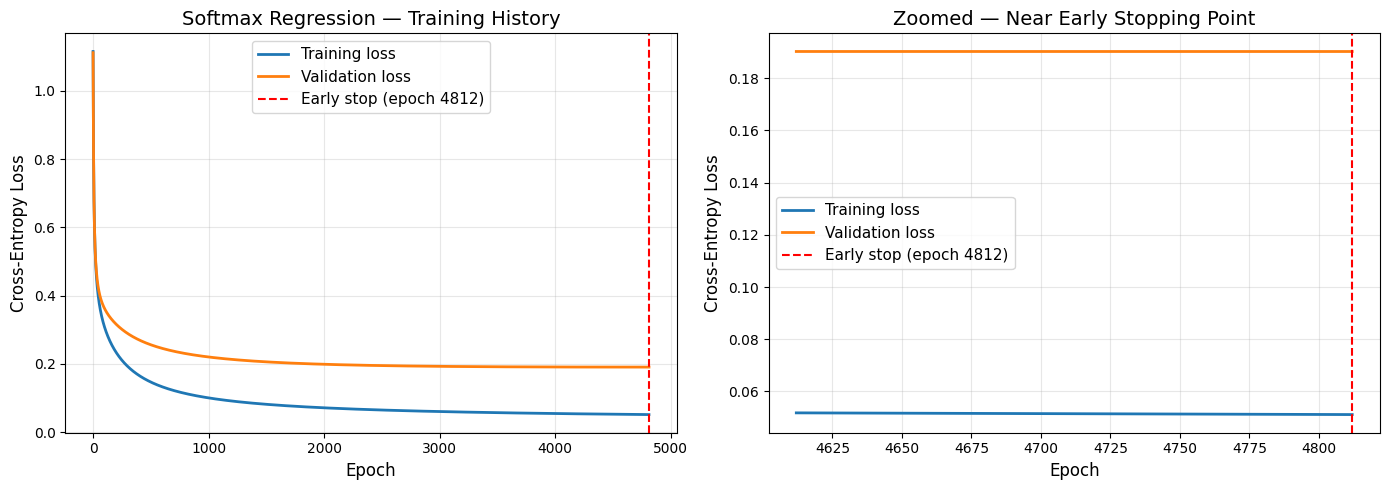

In [13]:
# ============================================================
# Visualize training and validation loss
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Full training history
axes[0].plot(train_losses, label='Training loss', linewidth=2)
axes[0].plot(val_losses, label='Validation loss', linewidth=2)
if stopped_epoch < len(train_losses):
    axes[0].axvline(x=stopped_epoch, color='r', linestyle='--', label=f'Early stop (epoch {stopped_epoch})')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Cross-Entropy Loss', fontsize=12)
axes[0].set_title('Softmax Regression — Training History', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Zoomed into the region where early stopping happened
zoom_start = max(0, stopped_epoch - 200)
zoom_end = min(len(train_losses), stopped_epoch + 50)
axes[1].plot(range(zoom_start, zoom_end), train_losses[zoom_start:zoom_end], label='Training loss', linewidth=2)
axes[1].plot(range(zoom_start, zoom_end), val_losses[zoom_start:zoom_end], label='Validation loss', linewidth=2)
if stopped_epoch < len(train_losses):
    axes[1].axvline(x=stopped_epoch, color='r', linestyle='--', label=f'Early stop (epoch {stopped_epoch})')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Cross-Entropy Loss', fontsize=12)
axes[1].set_title('Zoomed — Near Early Stopping Point', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# ============================================================
# Evaluate on the test set
# ============================================================

def predict_softmax(X, Theta):
    """Predict class labels using trained Softmax Regression model."""
    X_b = np.c_[np.ones(X.shape[0]), X]
    logits = X_b @ Theta
    probabilities = softmax(logits)
    return np.argmax(probabilities, axis=1)

# Predictions
y_train_pred = predict_softmax(X_train_scaled, best_Theta)
y_val_pred = predict_softmax(X_val_scaled, best_Theta)
y_test_pred = predict_softmax(X_test_scaled, best_Theta)

# Accuracy
train_acc = np.mean(y_train_pred == y_train) * 100
val_acc = np.mean(y_val_pred == y_val) * 100
test_acc = np.mean(y_test_pred == y_test) * 100

print("=" * 50)
print("Softmax Regression Results (from scratch)")
print("=" * 50)
print(f"Training accuracy:   {train_acc:.1f}%")
print(f"Validation accuracy: {val_acc:.1f}%")
print(f"Test accuracy:       {test_acc:.1f}%")
print()

# Confusion matrix (manual)
K = len(np.unique(y_test))
confusion = np.zeros((K, K), dtype=int)
for true, pred in zip(y_test, y_test_pred):
    confusion[true, pred] += 1

print("Confusion Matrix (Test Set):")
print(f"{'':>12} {'Pred 0':>8} {'Pred 1':>8} {'Pred 2':>8}")
for i in range(K):
    print(f"{'True ' + str(i):>12} {confusion[i, 0]:>8} {confusion[i, 1]:>8} {confusion[i, 2]:>8}")

# Per-class precision and recall
print("\nPer-class Metrics:")
for k in range(K):
    tp = confusion[k, k]
    fp = confusion[:, k].sum() - tp
    fn = confusion[k, :].sum() - tp
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    print(f"  Class {k} ({iris.target_names[k]:>12}): Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}")

Softmax Regression Results (from scratch)
Training accuracy:   97.8%
Validation accuracy: 93.3%
Test accuracy:       93.3%

Confusion Matrix (Test Set):
               Pred 0   Pred 1   Pred 2
      True 0       10        0        0
      True 1        0        9        1
      True 2        0        1        9

Per-class Metrics:
  Class 0 (      setosa): Precision=1.00, Recall=1.00, F1=1.00
  Class 1 (  versicolor): Precision=0.90, Recall=0.90, F1=0.90
  Class 2 (   virginica): Precision=0.90, Recall=0.90, F1=0.90


**Exercise 12 — Key Implementation Notes:**

1. **Softmax function:** Uses the log-sum-exp trick (subtracting the max) to prevent numerical overflow in `exp()`.
2. **One-hot encoding:** Converts integer labels to binary matrix for cross-entropy computation.
3. **Gradient computation:** Vectorized — computes gradients for all $K$ classes simultaneously using matrix operations.
4. **Early stopping:** Monitors validation loss with a patience parameter. Saves the best model and restores it when stopping.
5. **No Scikit-Learn:** Everything (softmax, cost, gradients, training loop, predictions, evaluation) is implemented from scratch with NumPy only.
6. **Feature scaling:** Applied before training to ensure Gradient Descent converges efficiently.